# Sustainability Week 1: the Carbon Footprint of Algorithms

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to use this notebook</p>
    <div style="padding: 0 0 2px 10px;">

Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important!  

Notebook by Maxime Lelièvre, Athina Papageorgiou Koufidou and the Responsible Software TAs team (2024).
Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

---

# Introduction

Welcome to this week's exercise session of CS-290 Responsible Software!

As software engineers and data scientists, it's essential that we consider the impact of the software we create on the environment and society. Beyond merely evaluating how well our software operates, we must also scrutinize its resource consumption and pollution emissions, ensuring that our digital solutions minimize their environmental footprint if possible. By comprehensively understanding the interconnectedness of technology with environmental and societal factors, we can pave the way for a more sustainable future.

In this notebook, you will explore the environmental impacts of **classic algorithms and Machine Learning (ML) models** by measuring their **carbon footprints**.

Imagine that you work as an engineer for Poodle Inc., a software company that has committed to the ambitious goal of reaching net zero emissions, i.e. remove from the environment as much carbon as it emits, by 2030. You have been tasked with measuring the carbon footprint of the company's products and making recommendations for reducing their environmental impact.

The main product of Poodle Inc. is a learning platform, used by schools and universities worldwide to manage their courses, assignments, and grades.

Let's get started!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning Goals</p>
    <div style="padding: 0 0 2px 10px;">
    
**What will be covered:**
- **Part 1: Measuring and evaluating the carbon footprint of classic algorithms**
- **Part 2: Measuring and evaluating the carbon footprint of machine learning models**

**By the end of the session you will be able to:**
- ✅  measure the carbon footprint of any algorithm,
- ✅  understand the parameters that impact the carbon footprint,
- ✅  find solutions to make your algorithms greener.
</div></div>
<br/>

---

# Part 1: Measuring the carbon footprint of classic algorithms

## 1.1 Toolbox

We are going to use a tool called [code carbon](link) for tracking CO2 emissions of code. It works by tracking the power usage of the CPU and GPU during the execution of the code and then translating that into CO2 emissions, based on the energy mix (fossil fuels, renewables) of the region where the code is running (or the cloud provider, if the code is running in the cloud). See the [documentation](link) for more details about the methodology.

To use it, instantiate a tracker object, call the function `start()` before the code you want to track and `stop()` afterwards.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cells below to import and use the `codecarbon` library.

</div></div>

In [1]:
from codecarbon import OfflineEmissionsTracker

In [2]:
# Instantiate the tracker, setting the country to Switzerland and the log level to "error" (to avoid a verbose output).
tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="CHE")
tracker.start()
try:
    # Compute intensive code goes here
    for i in range(10000000):
        _ = 1 + 1
finally:
    emissions = tracker.stop()

print("Total emissions: ", emissions, "kg of CO₂-equivalents [CO₂eq]")

[codecarbon INFO @ 11:52:16] offline tracker init


Total emissions:  7.256404252805174e-07 kg of CO₂-equivalents [CO₂eq]


Since electricity production [emits other greenhouse gases](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions#electricity) besides CO₂ (methane and nitrous oxide for example), each of them with different global warming potential, code carbon outputs emissions as CO₂ equivalents, i.e. the amount of CO₂ that would have the equivalent global warming impact.

## 1.2 Comparing the carbon emissions of two algorithms

As a first step in your task to reduce the environmental impact of Poodle Inc., you decide to audit the company's codebase, measuring the carbon footprint of some pieces of code that are frequently used and see if they can be optimized.

You run across two functions that seem to have very similar purposes, but you are not sure which one is more efficient in terms of energy consumption, so you decide to measure the carbon footprint of these two functions to compare them.

In [3]:
def get_top_ten_popular_courses(course_data):
    """Finds and returns the ten courses of the input DataFrame with the largest number of enrolled students, sorted in descending order. If two or more courses have the same number of students, they are also sorted in alphabetical order.

    Args:
        course_data (Pandas DataFrame): A DataFrame with two columns: `course_id` and `number of students`

    Returns:
        Pandas Dataframe: A slice of course_data, containing the ten courses with the largest number of students.
    """
    sorted_course = course_data.sort_values(
        kind="quicksort",
        by=["Number of students", "Course ID"],
        ascending=[False, True],
    )
    return sorted_course.head(10)

In [4]:
def get_most_popular_course(course_data):
    """Finds and returns the course of the input DataFrame with the largest number of enrolled students. If two or more courses have the same number of students, the first one in alphabetical order is returned.

    Args:
        course_data (Pandas DataFrame): A DataFrame with two columns: `course_id` and `number of students`

    Returns:
        list: A list containing the id of the course with the most students and the number of students enrolled in it.
    """
    # create a list of all courses included in the DataFrame
    course_list = (
        course_data.values.tolist()
    )  # 2-dimensional list of courses of the form [[course_id, number_of_students], ...]
    course_list_size = len(course_list)
    # iterate over all courses, comparing each one with those that come after it in the list
    for i in range(course_list_size):
        max_i = i  # index of the course with the maximum number of students
        for j in range(i + 1, course_list_size):
            # select the index of the course with the maximum number of students between the two that are compared in every iteration
            if course_list[j][1] > course_list[max_i][1]:
                max_i = j  # update the index of the course with the maximum number of students
        # swap the courses to sort the list
        (course_list[i][1], course_list[max_i][1]) = (
            course_list[max_i][1],
            course_list[i][1],
        )

    # if two or more courses have the same number of students, find the first one alphabetically
    max_n_students = course_list[0][1]
    first_alphabetically = course_list[0][0]
    most_popular_course = course_list[0]
    # iterate over all courses to find the first one alphabetically among those with the maximum number of students
    for i in range(course_list_size):
        # if the number of students of the course is equal to the maximum number of students, compare the course with the first one alphabetically and update the most popular course
        if (
            course_list[i][1] == max_n_students
            and course_list[i][0] < first_alphabetically
        ):
            first_alphabetically = course_list[i][0]
            most_popular_course = course_list[i]

    return most_popular_course

Both of those functions take as an argument a Pandas DataFrame with the following columns:
- `course_id`: the ID of the course
- `number_of_students`: the number of students enrolled in the course

You can find the database of all courses on the platform in the file `course_data.csv`.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the data from the file `res/course_data.csv` and display the first few rows.

</div></div>

In [5]:
import pandas as pd

course_data = pd.read_csv('res/course_data.csv')

course_data.head()

Course ID  Number of students
0  mrxihhsp1v                 547
1  5kwhgd3xru                1191
2  63p6vwu6vz                 738
3  ywpi6wp6ky                 921
4  60q7kkkcri                1797

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the code below to measure the carbon footprint of the two functions. Give as an argument the first 1000 rows of the `course_data` DataFrame (using the full dataset would make the code run too slow).

Note: the company's servers are located in Ireland, so we set the emission tracker to this location.

</div></div>

In [6]:
# BEGIN SOLUTION NO PROMPT
sample_course_data = course_data.head(1000)

tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
tracker.start()
try:
    most_popular_course = get_most_popular_course(sample_course_data)
finally:
    emissions = tracker.stop()
# END SOLUTION
""" # BEGIN PROMPT
sample_course_data = course_data.head(...)

tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
... # look at the cell in 1.1 for the missing code
try:
    most_popular_course = ...
finally:
    emissions = ...
"""; # END PROMPT 

print("Total emissions of the `get_most_popular_course` function: ", emissions, "kg of CO₂-equivalents [CO₂eq]")

Total emissions of the `get_most_popular_course` function:  2.8382071978405464e-07 kg of CO₂-equivalents [CO₂eq]


In [7]:
# BEGIN SOLUTION NO PROMPT
tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
tracker.start()
try:
    top_ten_popular_courses = get_top_ten_popular_courses(sample_course_data)
finally:
    emissions = tracker.stop()
# END SOLUTION
""" # BEGIN PROMPT
tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
...
try:
    top_ten_popular_courses = ...
finally:
    emissions = ...
"""; # END PROMPT

print("Total emissions of the `get_top_ten_popular_courses` function: ", emissions, "kg of CO₂-equivalents [CO₂eq]")

Total emissions of the `get_top_ten_popular_courses` function:  3.274843265875914e-08 kg of CO₂-equivalents [CO₂eq]


<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe? Which function is more efficient in terms of energy consumption? Can you think of some reasons why?

Hint: consider computational complexity.

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
The function `get_most_popular_course` uses a inefficient sorting algorithm, a version of [selection sort](link), which has a 
computational complexity of $O(n^2)$. The function `get_top_ten_popular_courses` uses quicksort, which has $O(n.log(n))$ complexity. As the processor has to make more operations to sort the list in the first function, it consumes more energy and as a result has a higher carbon footprint.

</div></div>

So, we have an indication that computational complexity might be important to consider when trying to reduce the carbon footprint of a piece of code. The question is how much of an impact a specific function may have. For example, a highly inefficient algorithm that is only ran once in a while might not have a big impact on the overall carbon footprint, however one that is used frequently, perhaps by millions of users, might have a significant impact.

Let's now examine what happens when we use different input sizes for the two functions and see how the carbon footprint changes.

**Note:** To prevent useless consumption of energy, we ran the following code and saved the data in the file `res/rcode_emissions.csv`. Feel free to uncomment and run the code yourself if you want, but it may take some time. Some small differences in the results are expected due to the difference in hardware, but the overall trends should be similar.

In [8]:
# input_sizes = [1000, 10000, 100000]
# emissions_most_popular = []
# emissions_top_ten = []

# for input_size in input_sizes:
#     tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
#     tracker.start()
#     try:
#         get_most_popular_course(course_data.head(input_size))
#     finally:
#         emissions_most_popular.append(tracker.stop())


# for input_size in input_sizes:
#     tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="IRL")
#     tracker.start()
#     try:
#         get_top_ten_popular_courses(course_data.head(input_size))
#     finally:
#         emissions_top_ten.append(tracker.stop())

# emissions = pd.DataFrame(
#     {
#         "Input size": [1000, 10000, 10000],
#         "get_most_popular_course": emissions_most_popular,
#         "get_top_ten_popular_courses": emissions_top_ten,
#     }
# ).set_index("Input size")
# emissions

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load and display `res/code_emissions.csv`.

</div></div>

In [9]:
emissions = pd.read_csv('res/code_emissions.csv')
emissions = emissions.set_index('Input size')
emissions

get_most_popular_course()  get_top_ten_popular_courses()
Input size                                                          
1000                     1.501242e-07                   8.087700e-08
10000                    6.914495e-06                   9.121753e-08
100000                   8.294697e-04                   4.244419e-07

Now, let's plot the carbon footprint of the two functions as a function of the input size.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the parameters of the plot below to display the carbon footprint of `get_most_popular_course` and `get_top_ten_popular_courses` as a function of the input size.

Hint: use a log scale for the y-axis; it makes it easier to compare values that differ by orders of magnitude.

</div></div>

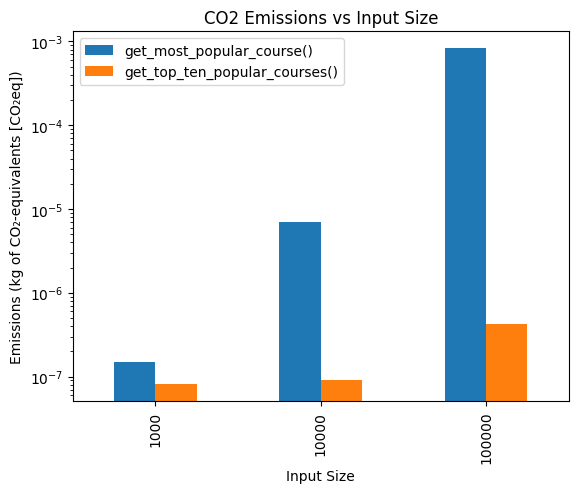

In [10]:
emissions.plot(
    kind="bar", # SOLUTION
    logy=True, # SOLUTION
    ylabel="Emissions (kg of CO₂-equivalents [CO₂eq])",
    xlabel="Input Size", 
    title="CO2 Emissions vs Input Size", 
);

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe in the plot? How does the carbon footprint of the two functions change with the input size?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
<div style="padding: 0 0 2px 10px;">
    
From the plot above, we can see that for relatively small inputs, the carbon footprint of the two functions is similar (in the same order of magnitude). However, as the input size increases, the carbon footprint of `get_most_popular_course()` grows exponentially due to the difference in computational complexity of the two algorithms.

</div></div>

## 1.3 Annual carbon footprint of a function

Since `get_most_popular_course` is clearly the most inefficient function of the two, refactoring it would be beneficial in terms of energy consumption. Since refactoring can be costly, the company would like to know if it is worth it and asks you to calculate its annual carbon footprint. (Refactoring this particular function is in fact not that complicated, but in a real-world scenario it could involve rewriting many parts of the codebase and potentially introducing new bugs, thus creating a lot of work for the developers and QA team).

You decide to check the codebase and figure out how often this function is called and with what input sizes. You find out that when a user registers for the first time, the function is called to display the most popular courses on the platform, with the whole dataset of courses (included in `courses.csv`) as input.

To calculate the carbon footprint of this function for a year, you will use the following formula:

$$
\text{yearly emissions} = \text{emissions per call} \times \text{estimated number of calls per year}
$$

To calculate the number of calls per year, we need to know how many new users register annually. This information is available in the file `res/registrations.csv`. You will need to load the dataframe and use it to calculate the average new users per year.

We have previously calculated the emissions per call for input size 100,000 (the size of the dataset) and saved it in `res/code_emissions.csv` that has been loaded into the dataframe `emissions`.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the file `res/registrations.csv` and display it.

</div></div>

In [11]:
registrations = pd.read_csv('res/registrations.csv')
registrations

Year  Registrations
0   2010         483411
1   2011        1020981
2   2012        2004793
3   2013        2107358
4   2014        2384946
5   2015        2898856
6   2016        2973002
7   2017        3203307
8   2018        4347951
9   2019        4924770
10  2020        5049288
11  2021        5513708

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Calculate the mean number of new users per year, rounded to the nearest integer.

**Hint:** The Pandas [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) and [`round`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html) functions will be useful here.

</div></div>

In [12]:
mean_registrations_per_year = registrations['Registrations'].mean() # SOLUTION
mean_registrations_per_year_rounded = mean_registrations_per_year.round() # SOLUTION

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Find the emissions per call for the function `get_most_popular_course` for input size 100,000 in the dataframe `emissions`.

**Hint:** Use the [`dataframe.at[index, column name]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html) function to get the value at a specific row and column.

</div></div>

In [13]:
emissions_per_call = emissions.at[100000, 'get_most_popular_course()'] # SOLUTION
emissions_per_call

0.0008294697498152

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Finally, calculate the yearly emissions of the function `get_most_popular_course` and display the result.

</div></div>

In [14]:
annual_emissions = mean_registrations_per_year_rounded * emissions_per_call	# SOLUTION
annual_emissions # SOLUTION

2551.4746639938


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Let's now create a function to be able to reuse this code in the future. Use the code you wrote above to create a function `calculate_annual_emissions` that takes as input the emissions per call and the registrations dataframe and returns the annual carbon emissions.

</div></div>

In [15]:
# BEGIN SOLUTION NO PROMPT
def calculate_annual_emissions(registrations, emissions_per_call):
    mean_registrations_per_year_rounded = registrations["Registrations"].mean().round()
    annual_emissions = mean_registrations_per_year_rounded * emissions_per_call
    return annual_emissions


# END SOLUTION

""" # BEGIN PROMPT
def calculate_annual_emissions(registrations, emissions_per_call):
    mean_registrations_per_year_rounded = ...
    annual_emissions = ...
    return annual_emissions
"""; # END PROMPT


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Call the function below and make sure the result is the same to the one you calculated above (the `annual_emissions` variable).

**Note:** We are using `math.isclose` for the comparison, as we are dealing with floating point numbers, which often [cannot be represented exactly in binary](https://docs.python.org/3/tutorial/floatingpoint.html).

</div></div>

In [16]:
import math

annual_emissions_withfunction = calculate_annual_emissions(registrations, emissions_per_call) # SOLUTION
math.isclose(annual_emissions_withfunction, annual_emissions)

True

Run the cell below to check your work.

In [21]:
import otter
test = otter.Notebook()

test.check("annual_emissions")

annual_emissions results: All test cases passed!

## 1.4 Carbon emissions conversion

In the previous section, we calculated the annual emissions of the function `get_most_popular_course` in kg CO₂ equivalents. But what does this number mean? How can we make it more understandable to the company's stakeholders?

It is often useful for communication purposes to translate carbon emissions into more relatable units. For example, we could express the emissions in terms of the number of kilometers driven by a car, the number of trees needed to offset the emissions, or the number of hours a light bulb could be powered by the same amount of energy.

For your report, you decide to not only present the raw numbers but also translate them to kilometers traveled using different modes of transportation.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the function below to convert the emissions to kilometers travelled by car, plane or rail. Round the results to the nearest integer.

See the table below for the conversion factors:

| Mode of transport | Emissions per kilometer per passenger (kg CO₂eq) |
|-------------------|--------------------------------------------------|
| Car               | 0.1639                                           |
| Plane             | 0.18592                                          |
| Rail              | 0.00446                                          |

Source: [2023 Greenhouse Gas Conversion Factors](https://www.gov.uk/government/publications/greenhouse-gas-reporting-conversion-factors-2023) by the UK Government Department for Energy Security and Net Zero.

</div></div>

In [22]:
def translate_emissions(CO2_kg):
    co2_kg_to_km_car = round(CO2_kg / 0.1639)  # SOLUTION
    co2_kg_to_km_plane = round(CO2_kg / 0.18592)  # SOLUTION
    co2_kg_to_km_rail = round(CO2_kg / 0.00446)  # SOLUTION

    return pd.DataFrame(
        {
            "CO2_kg": [round(CO2_kg)],
            "car_km": [co2_kg_to_km_car],
            "plane_km": [co2_kg_to_km_plane],
            "rail_km": [co2_kg_to_km_rail],
        }
    )

Run the cell below to check your work.

In [24]:
test.check("emissions_translation")

emissions_translation results: All test cases passed!

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Execute the cell below to see the results.

</div></div>

In [25]:
from res.utils import print_emissions_translation

print("The function `get_most_popular_course` emits", round(annual_emissions), "kg of CO₂eq per year.")
print_emissions_translation(translate_emissions(annual_emissions))

The function `get_most_popular_course` emits 2551 kg of CO₂eq per year.
2 551 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 15 567 km 
🛫 taking an international flight for 13 724 km or
🚂 travelling by train for 572 080 km.


This seems high enough to warrant refactoring. Moreover, during your audit, you discover other functions with similarly high carbon footprints that could be optimized. When you present your findings, however, the company decides that the refactoring cost is too high and ask you to propose an alternative solution.

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

What could be some alternative ways to reduce the carbon footprint of the codebase without refactoring?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

1. Caching: if a function is called multiple times, we could cache the result, reducing the number of calls to the function and therefore the carbon footprint.

2. Server location: the carbon footprint of code depends on the energy mix of the region where the servers are located. One possible solution could be to transfer the company's servers to a region with a low carbon intensity, i.e. where the electricity mix has a lower proportion of fossil fuels.

3. Re-evaluating the need for the function: if the function is not serving an important business purpose, it could be removed altogether.

</div></div>

## 1.5 Regional differences in carbon emissions

The company is interested in the potential energy savings if the servers were transferred to a region with a cleaner energy mix and task you with investigating which location would be the best choice.

To do this, you decide to calculate the carbon footprint of the function `get_most_popular_course` for different regions.

As before, we have already calculated the emissions by country to avoid you having to run an energy-intensive calculation. However, if you would like to execute the code yourself, you can do so by uncommenting and running the cell below. You may observe small variations between the result you calculate and the one we provide, due to differences in hardware, but the overall trends should be similar.

In [26]:
# import json
# f = open('res/global_energy_mix.json')
# data = json.load(f)
# countries = list(data.keys())

# emissions_by_country = {}

# for country_iso_code in countries:
#     tracker = OfflineEmissionsTracker(log_level="error", country_iso_code=country_iso_code)
#     tracker.start()
#     try:
#         get_most_popular_course(course_data.head(100))
#     finally:
#          emissions_by_country[country_iso_code] = tracker.stop()

# emissions_by_country = pd.DataFrame(emissions_by_country.items(), columns=['Country', 'Emissions'])
# country_iso_codes_to_names = pd.read_csv('res/countries.csv')
# emissions_by_country['Country'] = country_iso_codes_to_names['Country name']
# emissions_by_country.set_index('Country', inplace=True)


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the file `res/emissions_by_country.csv` and display the first rows.

</div></div>

In [27]:
emissions_by_country = pd.read_csv('res/emissions_by_country.csv')
emissions_by_country.set_index('Country', inplace=True)
emissions_by_country.head()

Emissions
Country                           
United Arab Emirates  6.494796e-08
Argentina             7.055103e-08
Australia             7.491369e-08
Austria               2.475763e-08
Burundi               3.601222e-08

We would like to find the ten countries with the lowest emissions and compare them with the emissions in Ireland, where the servers are currently located.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

First, filter the dataset to include only the ten countries with the lowest emissions.

1. Create a new dataframe with the values of the column "Emissions" sorted by increasing emissions.
2. Keep only the first 10 rows.
3. Add a row with the emissions in Ireland (Country: "Ireland")

Hint: the [`sort_values`](https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-by-one-column) function can be useful here.

</div></div>

In [28]:
emissions_by_country_sorted = emissions_by_country.sort_values('Emissions') # SOLUTION
top_ten_countries_with_lowest_emissions = emissions_by_country_sorted.head(10) # SOLUTION
countries_with_lowest_emissions_and_IRL = pd.concat([top_ten_countries_with_lowest_emissions, emissions_by_country[emissions_by_country.index == 'Ireland']])

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Now, plot the emissions of the ten countries with the lowest emissions and Ireland by completing the parameters of the plot below.

</div></div>

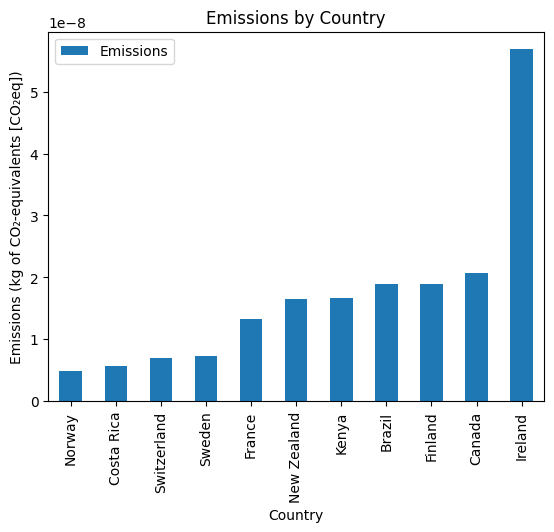

In [29]:
countries_with_lowest_emissions_and_IRL.plot(
    kind="bar", # SOLUTION
    ylabel="Emissions (kg of CO₂-equivalents [CO₂eq])", 
    xlabel="Country", 
    title="Emissions by Country",
);

You present your findings to the company and they decide to investigate the possibility of moving their infrastructure to Kenya, which is heavily [investing in sustainable energy sources](https://www.theguardian.com/environment/2024/jan/25/our-contribution-to-a-cleaner-world-how-kenya-found-an-extraordinary-power-source-beneath-its-feet). They ask you to investigate the annual carbon footprint of `get_most_popular_course()` if the servers were located in Kenya.


We have already calculated the emissions per call for Kenya, but you can run the code yourself if you want. As before, there may be small variations between the provided result and the one you calculate but the trends should be similar.

In [30]:
# tracker = OfflineEmissionsTracker(log_level="error", country_iso_code="KEN")
# tracker.start()
# try:
#     get_most_popular_course(course_data)
# finally:
#     emissions_per_call_KEN = tracker.stop()

# print("Total emissions: ", emissions_per_call_KEN, "kg of CO₂-equivalents [CO₂eq]")

In [31]:
emissions_per_call_KEN = 0.0003887125823619426

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Calculate the yearly emissions of the function `get_most_popular_course()` if the Poodle Inc. servers were located in Kenya. Use the `calculate_annual_emissions()` function you created before.

</div></div>

In [32]:
annual_emissions_KEN = calculate_annual_emissions(registrations, emissions_per_call_KEN) # SOLUTION

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Convert the annual emissions in Ireland and Kenya to kilometers traveled by car, plane or rail and print the results. Use the `translate_emissions()` function you created before.

</div></div>

In [33]:
# BEGIN SOLUTION NO PROMPT
print("Annual emissions in Kenya: ", round(annual_emissions_KEN), "kg of CO₂-equivalents [CO₂eq]")
print_emissions_translation(translate_emissions(annual_emissions_KEN))

annual_emissions_IRL = annual_emissions
print("\nAnnual emissions in Ireland: ", round(annual_emissions_IRL), "kg of CO₂-equivalents [CO₂eq]")
print_emissions_translation(translate_emissions(annual_emissions_IRL))

# END SOLUTION

""" # BEGIN PROMPT
print("Annual emissions in Kenya: ", round(annual_emissions_KEN), "kg of CO₂-equivalents [CO₂eq]")
print_emissions_translation(...)

annual_emissions_IRL = annual_emissions
print("\nAnnual emissions in Ireland: ", round(annual_emissions_IRL), "kg of CO₂-equivalents [CO₂eq]")
print_emissions_translation(...)
"""; # END PROMPT

Annual emissions in Kenya:  1196 kg of CO₂-equivalents [CO₂eq]
1 196 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 7 295 km 
🛫 taking an international flight for 6 431 km or
🚂 travelling by train for 268 092 km.

Annual emissions in Ireland:  2551 kg of CO₂-equivalents [CO₂eq]
2 551 kg of CO₂eq are equivalent to:
🚙 driving an average passenger car for 15 567 km 
🛫 taking an international flight for 13 724 km or
🚂 travelling by train for 572 080 km.


Run the cell below to check your work.

In [37]:
test.check("country_emissions")

country_emissions results: All test cases passed!

Following the presentation of your results, the company decides to move the servers to Kenya. They also commit to gradually refactoring the codebase to reduce the carbon footprint of the most energy-consuming functions.

# Part 2: Measuring the carbon footprint of Machine Learning models

## 2.1 Machine learning basics

Machine learning is a subfield of artificial intelligence that focuses on developing and studying algorithms that can learn patterns from data and use them to make predictions about previously unseen data. The main steps involved in training and using a machine learning model are the following:

- **Data collection**: First, we need to gather data that is relevant to the problem we want to solve, e.g. if our goal is to predict student performance, we need information about the grades, attendance, ranking etc. of past students. Collecting a sufficient amount of quality data is essential for training a model that can make accurate predictions.
- **Data preparation**: In this step, we clean and pre-process the data to make it suitable for training. This may involve removing missing values and duplicates, correcting errors, as well as removing potentially problematic data points (e.g. including a student's race in a model predicting their performance could lead to biased predictions). We also need to split the dataset into two parts: a training set, used to train the model, and a test set, used to evaluate its performance.
- **Algorithm selection**: There are many different types of machine learning algorithms; some are better suited for image recognition tasks, others for generating text or making predictions. In this notebook, we will compare three of the most popular ones: [random forest](https://en.wikipedia.org/wiki/Random_forest), [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), and [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression).
- **Training**: To train our model, we provide it with input data and the expected output (e.g. if the task is to recognize handwritten digits, the input would be images of digits and the output the corresponding digit). The model is then initialized with random parameters and asked to make a prediction based on the input data. We compare the prediction to the expected output and adjust the model's parameters to minimize the error. This process is repeated many times until the results are sufficiently accurate.
- **Evaluation**: Once the model is trained, we need to evaluate its performance on the test set we created during the data preparation step to ensure that it can generalize well to new, unseen data. This can provide a good estimate of how well the model will perform in practice.
- **Parameter tuning**: After evaluating the model, we may want to further improve the training process by fine-tuning its parameters. This can involve changing the number of times we iterate over the training data or adjusting the learning rate, i.e. how much the model's parameters are updated at each step.
- **Inference**: Finally, having trained and evaluated our model, we can use it to make predictions on new data, e.g. to identify students at risk of failure, differentiate images of cats from those of dogs or predict which sentence comes next in a text.

## 2.2 The carbon footprint of ML training and inference

Poodle Inc. is developing a new product: a predictive analytics tool that helps law schools identify students who might need extra support to pass the bar exam. The tools uses a machine learning model that, based on data from past students, predicts which candidates are most likely to succeed and which ones are at risk of failing. It then provides this information to the school administration, who can use it to allocate resources more effectively.

The product is currently in development and the company is interested in understanding its potential environmental impact before releasing it to its customers. They ask you to examine different machine learning models and make recommendations on how to reduce the carbon footprint of the product without compromising on performance.

In this section, we will explore how the carbon footprint of machine learning models can vary depending on model architecture, dataset size, and the hyperparameters used. We will also compare the environmental impact of training a model to that of using it and discuss some strategies to improve the sustainability of machine learning applications.

### 2.2.1 Data collection


To train the predictive analytics tool, the company provides you with a dataset containing information about students who have taken the bar exam in the past. It has been adapted from the Law School Admission Council (LSAC) survey conducted across 163 law schools in the United States in 1991.

It includes the following columns:

| Column name | Values | Description |
|-------------|--------|-------------|
| Decile Year 1 | [1, 10] | [Decile ranking](https://en.wikipedia.org/wiki/Decile) of the student in the first year of law school. Higher values indicate better performance. For example, a student in the 10th decile is in the top 10% of their class. |
| Decile Year 3 | [1, 10] | Decile ranking of the student in the third year of law school |
| LSAT score | [11, 48] | [Law School Admission Test](https://en.wikipedia.org/wiki/Law_School_Admission_Test) results of the student. |
| Undergraduate GPA | [1.5, 4.0] | Grade point average of the student during their undergraduate studies. |
| Tier | [1, 6] | Tier of the law school attended by the student. Higher values indicate higher-ranked schools. |
| Fulltime | {True, False} | Whether the student was enrolled full-time or part-time. |
| Family income bracket | [1, 5] | Family income by quintile. Higher values indicate higher income. |
| Gender | {"female", "male"} | Student gender |
| Passed bar exam | {True, False} | Whether the student passed the bar exam. |


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the file `res/law_school_data.csv` and display the first few rows.

</div></div>

In [38]:
law_school_data = pd.read_csv("res/law_school_data.csv")
law_school_data.head()

Decile Year 1  Decile Year 3  LSAT score  Undergraduate GPA  Tier  \
0           10.0           10.0        44.0                3.5   4.0   
1            5.0            4.0        29.0                3.5   2.0   
2            8.0            7.0        37.0                3.4   4.0   
3            8.0            7.0        43.0                3.3   4.0   
4            3.0            2.0        41.0                3.3   5.0   

   Fulltime  Family income bracket  Gender  Passed bar exam  
0      True                    5.0  female             True  
1      True                    4.0  female             True  
2      True                    3.0    male             True  
3      True                    4.0  female             True  
4      True                    4.0  female             True

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Display some basic information about the dataset, such as the number of rows and columns, the data types of each column, and the number of non-null values.  
You don't need to compute it yourself, a Pandas method can do it for you: [check this function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)!

</div></div>

In [39]:
law_school_data.info() # SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20798 entries, 0 to 20797
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Decile Year 1          20798 non-null  float64
 1   Decile Year 3          20798 non-null  float64
 2   LSAT score             20798 non-null  float64
 3   Undergraduate GPA      20798 non-null  float64
 4   Tier                   20798 non-null  float64
 5   Fulltime               20798 non-null  bool   
 6   Family income bracket  20798 non-null  float64
 7   Gender                 20798 non-null  object 
 8   Passed bar exam        20798 non-null  bool   
dtypes: bool(2), float64(6), object(1)
memory usage: 1.2+ MB


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Compute the number of rows in the dataset and assign it to the variable `n_entries`.

</div></div>

In [40]:
n_entries = len(law_school_data) # SOLUTION

Run the cell below to check your work.

In [42]:
test.check("data_collection")

data_collection results: All test cases passed!

### 2.2.2 Data Preparation


First, we will split our dataset into input values and expected output:
- The input should include the student's information: decile rankings, LSAT score, GPA, etc.
- The output should indicate whether the student passed the bar exam

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Create two DataFrames by selecting the right columns from `law_school_data`:
- `model_input` should contain the input columns 
- `model_exp_output` should contain the expected output column

</div></div>

In [43]:
# BEGIN SOLUTION NO PROMPT
model_input = law_school_data[
    [
        "Decile Year 1",
        "Decile Year 3",
        "LSAT score",
        "Undergraduate GPA",
        "Tier",
        "Fulltime",
        "Family income bracket",
        "Gender",
    ]
]
model_exp_output = law_school_data["Passed bar exam"].to_list()
# END SOLUTION

""" # BEGIN PROMPT
model_input = law_school_data[['Decile Year 1', ..., ..., ..., ..., ..., ..., ...]]
model_exp_output = law_school_data[...].to_list()
"""; # END PROMPT

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

Should we include all columns of the original dataset in the input values? If yes, why? If not, which columns should we exclude and why?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

In the original dataset, there are columns that are not directly related to student performance, such as `Family income bracket` and `Gender`. There are arguments both for and against using this information to train our model. 

Preserving this information about income and gender could lead to **biased predictions**, as the model might learn to associate certain characteristics with student success or failure. For example, it might be more likely to predict that students from lower-income families will fail the bar exam.
On the other hand, including those columns in the input values could help the model make more **accurate predictions**, thus increasing the chances that students who need extra support will receive it.

</div></div>

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

If we decide that some columns should be excluded because they might lead the model to make biased predictions, is simply removing them from the `model_input` DataFrame sufficient? Why or why not?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

Simply removing columns that could bias predictions is not always sufficient, because they might be correlated with other columns, e.g. students with higher family income might be more likely to attend high tier schools or study fulltime. Two solutions to mitigate this issue are:
- **transforming the data**, e.g. by modifying the values for some columns to obfuscate information about the protected attributes, while preserving the overall distribution of the data.
- **sample weighting**, which helps the model determine which samples it should focus on (what samples should be more represented than others during the training of the model), in order to be less biased.

See the Fairness 2 notebook for more information on debiasing.
</div></div>

In this notebook, for reasons of simplicity, we will preserve all columns in the input values. However, in a real-world scenario, it would be important to carefully consider which columns to include and how to handle potentially sensitive information.

Another transformation we need to make is to convert the categorical columns (e.g. `Gender`) into numerical values that the model can understand. This process can be done using techniques such as [one-hot encoding](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics) or [label encoding](https://scikit-learn.org/dev/modules/preprocessing_targets.html#label-encoding).

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Execute the cell below to convert the column `Gender` into numerical values.

</div></div>

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

model_input = model_input.copy()

# Apply label encoding to the "Gender" column
model_input["Gender"] = le.fit_transform(model_input["Gender"])

model_input.head()

Decile Year 1  Decile Year 3  LSAT score  Undergraduate GPA  Tier  \
0           10.0           10.0        44.0                3.5   4.0   
1            5.0            4.0        29.0                3.5   2.0   
2            8.0            7.0        37.0                3.4   4.0   
3            8.0            7.0        43.0                3.3   4.0   
4            3.0            2.0        41.0                3.3   5.0   

   Fulltime  Family income bracket  Gender  
0      True                    5.0       0  
1      True                    4.0       0  
2      True                    3.0       1  
3      True                    4.0       0  
4      True                    4.0       0

Let's now split the dataset into a training and an evaluation set.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Use the [`test_train_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split the dataset into two sets of rows:
- a training set with 70% of the rows
- an evaluation set with 30% of the rows.

**Note**: the `random_state` parameter allows setting a seed value for the random number generator used in the splitting process. This ensures that the same split is obtained every time the code is executed with the same seed value.

</div></div>

In [45]:
from sklearn.model_selection import train_test_split

# BEGIN SOLUTION NO PROMPT
train_data, eval_data, train_output, eval_output = train_test_split(model_input, model_exp_output, test_size=0.3, train_size=0.7, random_state=42)
# END SOLUTION

""" # BEGIN PROMPT
train_data, eval_data, train_output, eval_output = train_test_split(model_input, model_exp_output, test_size=..., train_size=..., random_state=42)
"""; # END PROMPT

print("The training dataset contains", len(train_data), "rows, while the evaluation dataset contains", len(eval_data), "rows.")

The training dataset contains 14558 rows, while the evaluation dataset contains 6240 rows.


Run the cell below to check your work.

In [48]:
test.check("data_preparation")

data_preparation results: All test cases passed!

### 2.2.3 Carbon emissions of training ML models


We will now measure and compare the carbon footprint of three different machine learning algorithms ([random forest](https://en.wikipedia.org/wiki/Random_forest), [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) and [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)).

To avoid generating carbon emissions, we have done the training ourselves and stored the results in a CSV file.  
The raw cell below contains the code for the training. If you want to execute it, you should transform it into a code cell by:
- selecting the cell below 
- select `Code` instead of `Raw` in the dropdown menu at the top of the notebook.


Note: we have defined a helper function called `train_model` in the `utils` module that trains the models using the selected algorithm.  
This is the function signature and description:

```python
def train_model(algorithm, train_data, train_output)
    """
    Trains a machine learning model using the specified algorithm.

    Parameters:
    algorithm (str): The algorithm to use for training the model.
    train_data (array-like): The training data.
    train_output (array-like): The target variable for training.

    Returns:
    trained_model: The trained machine learning model.
    """
```

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the results in terms of carbon footprint and training time of training the three machine learning models.

</div></div>

In [49]:
# Load file
train_algorithm_comparison = pd.read_csv("res/train_algorithm_comparison.csv", index_col=0)

# Display the result
train_algorithm_comparison

Emissions [kg of CO2 eq.]  Execution time [seconds]
Random forest                     7.337033e-07                  1.200697
K-nearest neighbors               1.806882e-08                  0.054596
Logistic regression               2.354318e-06                  3.357467

Now, let's visualize the results by plotting the execution time and carbon footprint of training each model.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the parameters of the plot below.

See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) for more information on how to customize the plot.


</div></div>

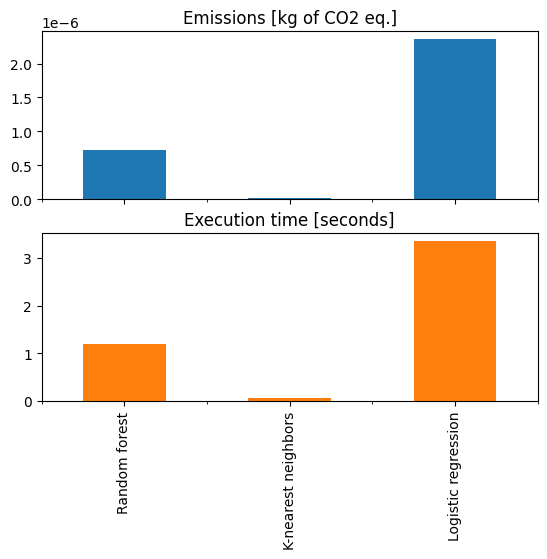

In [50]:
train_algorithm_comparison.plot(
    subplots=True,
    kind="bar", # SOLUTION
    legend=False,
);

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

How do the carbon footprints and training times of the three models compare? What could be some reasons for these differences?

</div></div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

From the plots above, we can see that the carbon footprint of the Logistic Regression model is higher than that of the K-Nearest Neighbors and Random Forest models. However, this is odd because the Random Forest is theoritically more computer intensive (requires more computational resources to train and make predictions). This behavior is clearly shown on personnal computer but not on Noto servers. This enlighten the potential difference of implementations or accelerations from a plateform to another and one should not only focus on therorical data but also on real case scenario.

Regarding training times, the training of the K-Nearest Neighbors model is the fastest, whereas the training of the Logistic Regression model is the slowest.  
We can notice that there is a direct relationship between training time and carbon footprint for the training. However, this is not always the case because faster operations can sometimes consume more energy. For example in multi threaded computing where you could use 10 CPU cores instead of 1 for the same task and see the time be divided by 10 but the emission stay the same (considering a 10 perfect ratio improvement).
</div></div>

### 2.2.4 Carbon emissions of evaluating ML models


Having trained our models, we can now evaluate their performance on the evaluation set we created earlier. We would like to determine which model makes more accurate predictions, as well as which one has the lowest carbon footprint.

Again, to avoid generating carbon emissions, we have done the evaluation ourselves and stored the results in a CSV file.  
The raw cell below contains the code for the evaluation. If you want to execute it, you should transform it into a code cell by:
- selecting the cell below 
- select `Code` instead of `Raw` in the dropdown menu at the top of the notebook.

Note: we have defined a helper function called `evaluate_model` in the `utils` module that evaluates the models.  
This is the function signature and description:

```python
def eval_model(model, eval_data, eval_output):
    """
    Evaluates the performance of a given model.

    Parameters:
    model (object): The trained model object.
    eval_data (array-like): The evaluation data.
    eval_output (array-like): The true output values for the evaluation data.

    Returns:
    float: The accuracy, i.e. the fraction of correctly classified samples in the evaluation data.
    """
```

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the results in terms of carbon footprint and training time of evaluating the three machine learning models.

</div></div>

In [51]:
# Load file
eval_algorithm_comparison = pd.read_csv("res/eval_algorithm_comparison.csv", index_col=0)

# Display the result
eval_algorithm_comparison

Emissions [kg of CO2 eq.]  Accuracy  \
Random forest                     3.543425e-08  0.903846   
K-nearest neighbors               3.968319e-07  0.883333   
Logistic regression               9.051167e-09  0.902083   

                     Execution time [seconds]  
Random forest                        1.394218  
K-nearest neighbors                  1.869027  
Logistic regression                  1.721080

Now, let's visualize the results.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the parameters of the plot below to compare the accuracy of the three models.

</div></div>

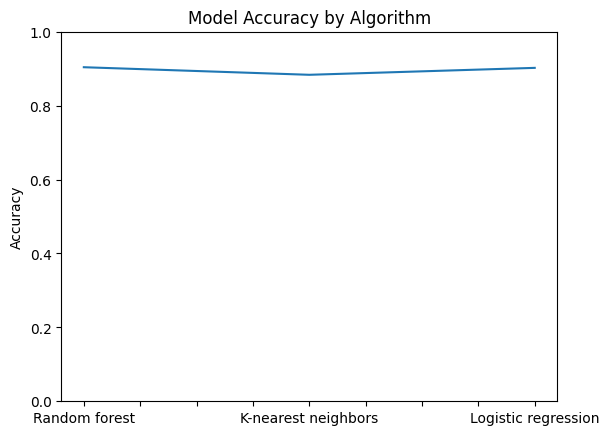

In [52]:
eval_algorithm_comparison['Accuracy'].plot(
    yticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
    kind="line", # SOLUTION
    ylabel="Accuracy",
    title="Model Accuracy by Algorithm", 
);

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cells below to compare the execution time and carbon footprint of evaluation to those of training.

</div></div>

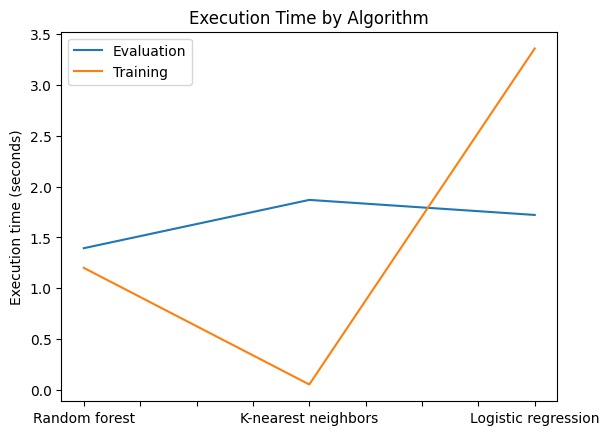

In [53]:
ax = eval_algorithm_comparison['Execution time [seconds]'].plot()
train_algorithm_comparison['Execution time [seconds]'].plot(ax=ax, legend=True)
ax.legend(["Evaluation", "Training"])
ax.title.set_text("Execution Time by Algorithm")
ax.set_ylabel("Execution time (seconds)");

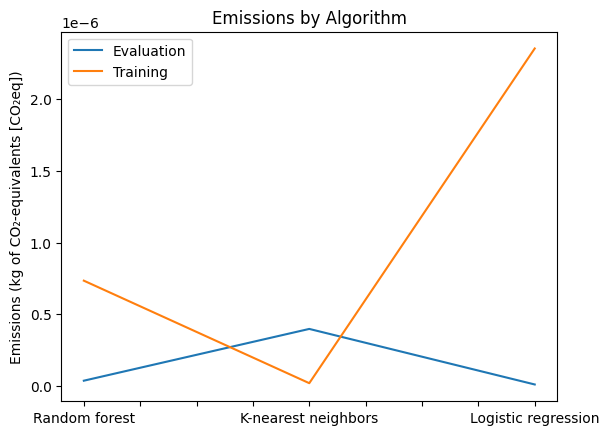

In [54]:
ax = eval_algorithm_comparison['Emissions [kg of CO2 eq.]'].plot()
train_algorithm_comparison['Emissions [kg of CO2 eq.]'].plot(ax=ax)
ax.legend(["Evaluation", "Training"])
ax.title.set_text("Emissions by Algorithm")
ax.set_ylabel("Emissions (kg of CO₂-equivalents [CO₂eq])");

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

How do the carbon footprints and execution times of training and evaluation compare? What could be some reasons for these differences?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

From the plots above, we can see that the carbon footprint of the training phase is significantly higher than that of the evaluation phase for the random forest and the logistic regression algorithms. However, k-nearest neighbors requires more energy for evaluation than for training.

This is because the model architecture significantly affects how much energy is consumed during training vs evaluation. For example, the random forest model is more complex and requires more computational resources during training, while being relatively efficient during evaluation. On the other hand, the k-nearest neighbors algorithm is simpler and requires less energy during training, but more during evaluation.

In addition, while the profile of execution time is very similar to the profile of emissions for the training phase, there is a difference between execution time and emissions for the evaluation phase. So while execution time can be an indicator for emissions, it is not always directly related, i.e. the speed of computation does not always correlate with the energy consummed by the computation and the corresponding emissions.
</div></div>

### 2.2.5 Impact of training dataset size on carbon emissions

After you present the above analysis to the company, they ask you to investigate the possibility to reduce the carbon footprint of the product during the training and evaluation phases. To do that, you decide to explore whether reducing the size of the dataset will have an impact on the emissions and accuracy of the models.

Again, to avoid having to do an energy-intensive calculation, we have run the training and evaluation phases with different fractions of the initial training dataset (20%, 40%, 60%, 80% and 100%) and saved the results in the file `res/training_results.csv`.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the file `res/training_results.csv` and display it.

</div></div>

In [55]:
# Load file
training_results = pd.read_csv("res/training_results.csv")

# Reshape the data for better visualization
training_results= training_results.pivot(index='% of original dataset', columns='Algorithm', values=['Accuracy', 'Emissions [kg of CO2 eq.]'])

# Display the results table
training_results

Accuracy                                    \
Algorithm             K-nearest neighbors Logistic regression Random forest   
% of original dataset                                                         
20.0                             0.890224            0.905449      0.894231   
40.0                             0.885417            0.901442      0.889423   
60.0                             0.880609            0.899038      0.894765   
80.0                             0.875801            0.902444      0.899239   
100.0                            0.879006            0.901763      0.898237   

                      Emissions [kg of CO2 eq.]                      \
Algorithm                   K-nearest neighbors Logistic regression   
% of original dataset                                                 
20.0                               5.733922e-08        2.706309e-08   
40.0                               5.132374e-08        2.755964e-08   
60.0                               6.832447e-08        3.096156e-08   
80.0                               9.722086e-08        4.911530e-08   
100.0                              1.033785e-07        3.374259e-08   

                                     
Algorithm             Random forest  
% of original dataset                
20.0                   8.913673e-08  
40.0                   1.225332e-07  
60.0                   1.646217e-07  
80.0                   1.986399e-07  
100.0                  2.450058e-07

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Plot the carbon footprint and accuracy of the three models as a function of the dataset size.

</div></div>

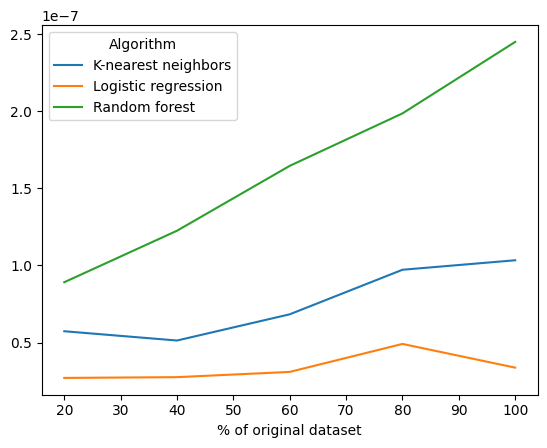

In [56]:
# BEGIN SOLUTION NO PROMPT
training_results['Emissions [kg of CO2 eq.]'].plot()

# END SOLUTION

""" # BEGIN PROMPT

training_results['Emissions [kg of CO2 eq.]']. ...

"""; # END PROMPT

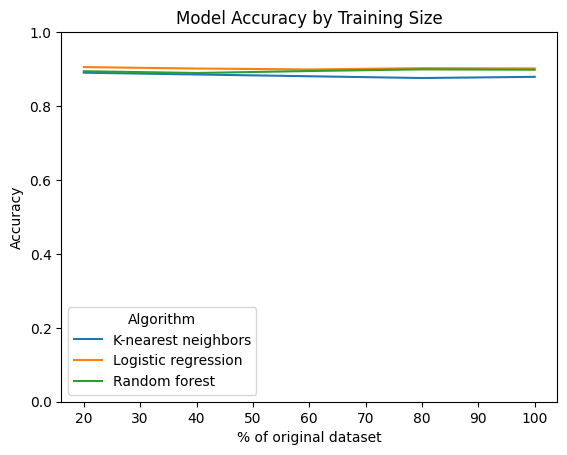

In [57]:
training_results['Accuracy'].plot(
    yticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
    kind="line", # SOLUTION
    ylabel="Accuracy", 
    title="Model Accuracy by Training Size", 
);

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time</p>
    <div style="padding: 0 0 2px 10px;">

- How does the carbon footprint of the models change as the dataset size increases? 
- What is the relationship between the dataset size used for training and the accuracy?
- What recommendations would you make to the company based on these results?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

- From the first plot, we can see that the carbon footprint of the models, especially random forest, increases as the dataset size increases. This is because larger datasets require more computational resources to process and train the models.

- However, it seems like the accuracy of the models does not improve significantly with larger datasets. 

- This suggests that using a smaller dataset to train and validate our model could be a viable strategy to reduce the carbon footprint of the product without compromising on performance.

</div></div>

# [Optional] Part3: Code Optimization for Sustainability

## 3.1 - Introduction

Remember the first function of the notebook in 1.2 `get_most_popular_course()` to calculate the most popular course? The complexity of the function was $O(n^2)$ and the execution time was quite long. Calling this function multiple times could have a significant impact on the overall carbon footprint especially if it is used at large scale.

We propose this **optional exercise** to optimize and hence reducing the total emissions of this function. If you don't have time to do it it's fine!


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Load the dataset and the function definition below.

</div></div> 

In [58]:
import os
from res.utils import AlgorythmOptimizationTest
from time import perf_counter
df_course = pd.read_csv(os.path.join('res', 'course_data.csv'))
df_course = df_course.head(7000)
df_course.head()

Course ID  Number of students
0  mrxihhsp1v                 547
1  5kwhgd3xru                1191
2  63p6vwu6vz                 738
3  ywpi6wp6ky                 921
4  60q7kkkcri                1797

We recall that the function `get_most_popular_course()` retrieves the most popular course (maximum number of students enrolled) from the dataset. If there are multiple courses with the same maximum number of students, the function returns the first course ID in the alphabetical order.

We just copy pasted the function definition below for you to have it handy:

In [59]:
def slow_function(course_data):
    """Finds and returns the course of the input DataFrame with the largest number of enrolled students. If two or more courses have the same number of students, the first one in alphabetical order is returned.

    Args:
        course_data (Pandas DataFrame): A DataFrame with two columns: `course_id` and `number of students`

    Returns:
        list: A list containing the id of the course with the most students and the number of students enrolled in it.
    """
    # create a list of all courses included in the DataFrame
    course_list = (
        course_data.values.tolist()
    )  # 2-dimensional list of courses of the form [[course_id, number_of_students], ...]
    course_list_size = len(course_list)
    # iterate over all courses, comparing each one with those that come after it in the list
    for i in range(course_list_size):
        max_i = i  # index of the course with the maximum number of students
        for j in range(i + 1, course_list_size):
            # select the index of the course with the maximum number of students between the two that are compared in every iteration
            if course_list[j][1] > course_list[max_i][1]:
                max_i = j  # update the index of the course with the maximum number of students
        # swap the courses to sort the list
        (course_list[i], course_list[max_i]) = (
            course_list[max_i],
            course_list[i],
        )

    # if two or more courses have the same number of students, find the first one alphabetically
    max_n_students = course_list[0][1]
    first_alphabetically = course_list[0][0]
    most_popular_course = course_list[0]
    # iterate over all courses to find the first one alphabetically among those with the maximum number of students
    for i in range(course_list_size):
        # if the number of students of the course is equal to the maximum number of students, compare the course with the first one alphabetically and update the most popular course
        if (
            course_list[i][1] == max_n_students
            and course_list[i][0] < first_alphabetically
        ):
            first_alphabetically = course_list[i][0]
            most_popular_course = course_list[i]

    return most_popular_course

## 3.2 - Optimiztion

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Complete the function `optimized_function(course_data)` such that it returns the **same result** as the function `slow_function(course_data)` but faster. You can achieve results as fast as 1000-2000 times faster than the original function.

Performance hints:
- Medium : use only one for loop
- Fast : No for loops and use sorting algorithms
- Very fast : Use only Pandas functions

</div></div> 

In [60]:
# BEGIN SOLUTION NO PROMPT
def optimized_function(course_data):
    """Finds and returns the course of the input DataFrame with the largest number of enrolled students. If two or more courses have the same number of students, the first one in alphabetical order is returned.

    Args:
        course_data (Pandas DataFrame): A DataFrame with two columns: `course_id` and `number of students`

    Returns:
        list: A list containing the id of the course with the most students and the number of students enrolled in it.
    """
    
    ### FIRST SOLUTION (x5-8)

    # max_course = -1
    # id_course = None

    # for index, row in df_course.iterrows():
    #     if row['Number of students'] > max_course:
    #         max_course = row['Number of students']
    #         id_course = row['Course ID']
    #     elif row['Number of students'] == max_course:
    #         if id_course is None or row['Course ID'] < id_course:
    #             id_course = row['Course ID']

    # return [id_course, max_course]

    ### SECOND SOLUTION (x150-200)
    # course_data.sort_values(
    #     kind="quicksort",
    #     by=["Number of students", "Course ID"],
    #     ascending=[False, True],
    #     inplace=True,
    # )
    # result = course_data.head(1)
    # return [result["Course ID"].values[0], result["Number of students"].values[0]]

    ### THIRD SOLUTION (x1500-2000)
    #Find the maximum number of students
    max_students = df_course['Number of students'].max()

    # Filter the DataFrame to get the courses with the maximum number of students
    max_courses = df_course[df_course['Number of students'] == max_students]

    # Find the course ID that comes first alphabetically among the max courses
    chosen_course_id = max_courses['Course ID'].min()

    # Get the number of students for the chosen course
    chosen_course_students = max_students

    # Return both the course ID and the number of students
    result = [chosen_course_id, chosen_course_students]
    
    return result
# END SOLUTION
""" # BEGIN PROMPT
def optimized_function(course_data):
    ...
"""; # END PROMPT

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
You can test your function by running the cell below. To test for the speed you first need to be sure that the function is correct.

</div></div> 

In [61]:
tester = AlgorythmOptimizationTest(perf_counter, optimized_function, df_course)
tester.test(n=3)

Your function is correct.
Optimized function is 1543.59 times faster than the slow function.


# Congratulations! You have finished this notebook!